# <center><b>PI Modelisation</b></center>


In [66]:
import time
#print("Execution time: " + str((time.time() - start_time)) + ' ms')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
##########################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('Final.csv',sep=',')

In [3]:
df.head()

,Unnamed: 0,typeImmatriculation_ES,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU,energieVoiture_ESS-GAZ GPL,energieVoiture_ESSENCE,energieVoiture_GASOIL,marqueVoiture_AUDI,marqueVoiture_BERLIET,...,gouvernoratAssure_Siliana,gouvernoratAssure_Sousse,gouvernoratAssure_Tataouine,gouvernoratAssure_Tunis,gouvernoratAssure_Zaghouan,typePolice,naturePolice,puissanceFiscalVoiture,anneesExpAssure,classeBonusMalus
0,60,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,4.0,35.0,3.0
1,63,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,1,5.0,16.0,3.0
2,77,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,1,1,5.0,16.0,1.0
3,79,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,5.0,27.0,2.0
4,99,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,5.0,21.0,3.0


In [4]:
df.shape

(1060, 92)

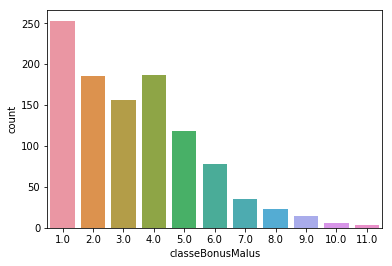

In [5]:
ax = sns.countplot('classeBonusMalus', data = df)
plt.show()

In [6]:
df.classeBonusMalus[(df.classeBonusMalus >= 1.0) & (df.classeBonusMalus <= 4.0) ] = 1
df.classeBonusMalus[(df.classeBonusMalus >= 5.0) & (df.classeBonusMalus <= 7.0) ] = 2
df.classeBonusMalus[(df.classeBonusMalus >= 8.0) & (df.classeBonusMalus <= 11.0) ] = 3

- cluster 1 : Bon client
- cluster 2 : Client normale
- cluster 3 : Mauvais client

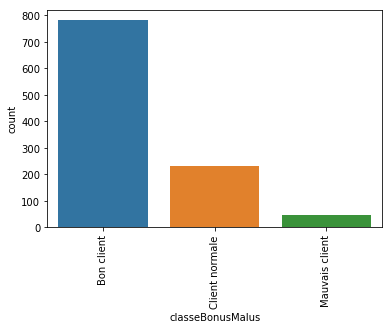

In [7]:
ax = sns.countplot('classeBonusMalus', data = df)
ax.set_xticklabels(['Bon client','Client normale','Mauvais client'],rotation = 90)
plt.show()

In [8]:
df['classeBonusMalus'].unique()

array([1., 2., 3.])

# <center><b>`Modelisation`</b> </center>

In [9]:
X = df.drop(['classeBonusMalus'], axis=1)
y = df['classeBonusMalus']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)

In [ ]:
#Scaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.fit_transform(X_test)

In [42]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

In [147]:
def best_model(model, x_train, y_train, x_test, y_test, grid_params):
    
    #GridSearchCV
    grid = GridSearchCV(model, grid_params, return_train_score=True).fit(x_train, y_train)
    estimator = grid.best_estimator_
    table = pd.DataFrame(grid.cv_results_).loc[:, 
                ['params', 'mean_test_score', 'std_test_score','mean_train_score', 
                 'std_train_score']].sort_values(by='mean_test_score', ascending=False)    
    params = grid.best_params_
    bestScore=grid.best_score_
    preds = estimator.predict(x_test)
    
    print(classification_report(y_test, preds))
    instance = (isinstance(estimator,XGBClassifier) or isinstance(estimator,AdaBoostClassifier) or isinstance(estimator,DecisionTreeClassifier))
    
    if (instance) : 
        imp = get_feature_importance(estimator,X_train)
    else :
        imp = 0
    F1 = f1_score(y_true = y_test, y_pred = preds,pos_label='positive',average='micro') # pos_label / average => zednehom khater multiclass moch binair kim lokhrin
    print("F1Score : ",F1)

    return estimator, table, params, imp,bestScore

# 1. KNN

In [111]:

kN = KNeighborsClassifier()
est, table, params, imp ,bestScore= best_model(kN, X_train, y_train,
                                X_test,y_test,
                                 grid_params=[{'n_neighbors':list(range(1,25))}])

precision    recall  f1-score   support

         1.0       0.76      1.00      0.86       161
         2.0       0.00      0.00      0.00        41
         3.0       0.00      0.00      0.00        10

    accuracy                           0.76       212
   macro avg       0.25      0.33      0.29       212
weighted avg       0.58      0.76      0.66       212

F1Score :  0.7594339622641509


In [112]:
est

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [113]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
19,{'n_neighbors': 20},0.731138,0.002114,0.730837,0.000610
23,{'n_neighbors': 24},0.729962,0.003751,0.730837,0.000610
13,{'n_neighbors': 14},0.729962,0.003751,0.731721,0.002886
22,{'n_neighbors': 23},0.729962,0.003751,0.730837,0.000610
21,{'n_neighbors': 22},0.729962,0.003751,0.730837,0.000610
20,{'n_neighbors': 21},0.729962,0.003751,0.731132,0.000716
17,{'n_neighbors': 18},0.729962,0.005299,0.731132,0.001071
15,{'n_neighbors': 16},0.729955,0.001986,0.732900,0.001256
18,{'n_neighbors': 19},0.728778,0.003280,0.732016,0.001503
14,{'n_neighbors': 15},0.728778,0.003280,0.730541,0.002310


In [ ]:
# Le meilleur score selon gridsearch : Kifkif heya w l Accuracy
bestScore

In [114]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')
knn_model = knn.fit(X_train, y_train)

In [115]:
print('Accuracy of KNN  Model on training set: {:.2f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of KNN Model on test set: {:.2f}'
     .format(knn_model.score(X_test, y_test)))

Accuracy of KNN  Model on training set: 0.74
Accuracy of KNN Model on test set: 0.75


In [109]:
error = []

for i in range(1, 25):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Erreur')

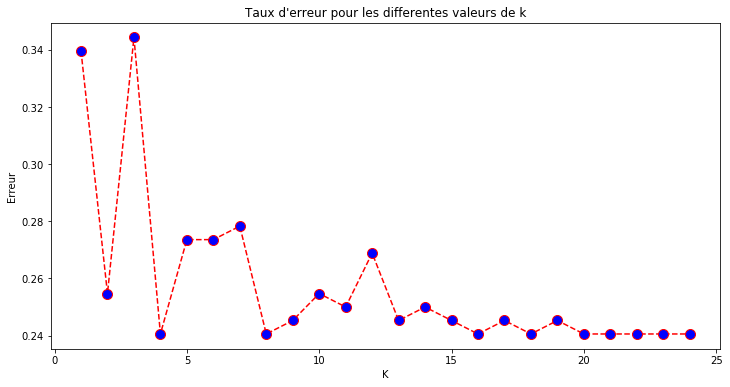

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux d\'erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

# 2. LinearSVC

In [122]:
# 
sv = LinearSVC()
est, table, params, imp,bestScore = best_model(sv, X_train, y_train,
                                X_test,y_test,
                                 grid_params=[{'C':[1, 2, 4, 6, 10,20]}])

precision    recall  f1-score   support

         1.0       0.76      1.00      0.86       161
         2.0       0.00      0.00      0.00        41
         3.0       0.00      0.00      0.00        10

    accuracy                           0.76       212
   macro avg       0.25      0.33      0.29       212
weighted avg       0.58      0.76      0.66       212

F1Score :  0.7594339622641509


In [123]:
est

LinearSVC(C=4, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [124]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
2,{'C': 4},0.660543,0.130484,0.652666,0.132498
5,{'C': 20},0.630686,0.146466,0.633304,0.136481
0,{'C': 1},0.627616,0.191139,0.624940,0.187123
4,{'C': 10},0.489363,0.237989,0.493829,0.245240
1,{'C': 2},0.473832,0.168373,0.475871,0.147487
3,{'C': 6},0.437466,0.157389,0.444888,0.153867


In [127]:
SVC =LinearSVC(C=4, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

SVCModel =SVC.fit(X_train, y_train) 

In [128]:
print('Accuracy of svModel  Model on training set: {:.2f}'
     .format(SVCModel.score(X_train, y_train)))
print('Accuracy of svModel Model on test set: {:.2f}'
     .format(SVCModel.score(X_test, y_test)))

Accuracy of svModel  Model on training set: 0.46
Accuracy of svModel Model on test set: 0.44


# 3.DecisionTreeClassifier

In [131]:
dt = DecisionTreeClassifier()
est, table, params, imp,bestScore = best_model(dt, X_train,y_train,
                                X_test,y_test,
                                grid_params=[{'max_depth':list(range(1,20))}])

precision    recall  f1-score   support

         1.0       0.76      1.00      0.86       161
         2.0       0.00      0.00      0.00        41
         3.0       0.00      0.00      0.00        10

    accuracy                           0.76       212
   macro avg       0.25      0.33      0.29       212
weighted avg       0.58      0.76      0.66       212

F1Score :  0.7594339622641509


In [132]:
est

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [133]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
0,{'max_depth': 1},0.731138,0.002114,0.731132,0.000528
2,{'max_depth': 3},0.728771,0.005335,0.742925,0.002692
1,{'max_depth': 2},0.727609,0.006229,0.736144,0.001332
3,{'max_depth': 4},0.702868,0.022350,0.759142,0.005365
4,{'max_depth': 5},0.696972,0.022051,0.771820,0.006288
6,{'max_depth': 7},0.673352,0.020884,0.813685,0.010178
5,{'max_depth': 6},0.673331,0.025947,0.792751,0.007674
8,{'max_depth': 9},0.665110,0.010266,0.868224,0.021436
7,{'max_depth': 8},0.660369,0.019329,0.838154,0.015532
9,{'max_depth': 10},0.655698,0.019255,0.890629,0.023137


In [134]:
DCtreeClassifier =DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTreeClassifierModel =DCtreeClassifier.fit(X_train, y_train) 

In [135]:
print('Accuracy of DecisionTreeClassifier  Model on training set: {:.2f}'
     .format(DecisionTreeClassifierModel.score(X_train, y_train)))
print('Accuracy of DecisionTreeClassifier Model on test set: {:.2f}'
     .format(DecisionTreeClassifierModel.score(X_test, y_test)))

Accuracy of DecisionTreeClassifier  Model on training set: 0.73
Accuracy of DecisionTreeClassifier Model on test set: 0.76


In [ ]:
# Le meilleur score selon gridsearch : Kifkif heya w l Accuracy
bestScore

# 4.GaussianNB

In [136]:
gnb = GaussianNB()
est, table, params, imp,bestScore = best_model(gnb, X_train, y_train,
                                X_test,y_test,
                                grid_params=[{'var_smoothing':[1e-2, 1e-3, 1e-4, 1e-5,
                                                               1e-6, 1e-7, 1e-8, 1e-9]}])

precision    recall  f1-score   support

         1.0       0.76      1.00      0.86       161
         2.0       0.00      0.00      0.00        41
         3.0       0.00      0.00      0.00        10

    accuracy                           0.76       212
   macro avg       0.25      0.33      0.29       212
weighted avg       0.58      0.76      0.66       212

F1Score :  0.7594339622641509


In [137]:
est

GaussianNB(priors=None, var_smoothing=0.01)

In [138]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
0,{'var_smoothing': 0.01},0.726411,0.003120,0.726122,0.004468
1,{'var_smoothing': 0.001},0.726411,0.003120,0.726122,0.004468
2,{'var_smoothing': 0.0001},0.726411,0.003120,0.726122,0.004468
3,{'var_smoothing': 1e-05},0.726411,0.003120,0.726122,0.004468
4,{'var_smoothing': 1e-06},0.726411,0.003120,0.726122,0.004468
5,{'var_smoothing': 1e-07},0.721692,0.007101,0.727596,0.005788
6,{'var_smoothing': 1e-08},0.719332,0.012878,0.719340,0.004174
7,{'var_smoothing': 1e-09},0.699262,0.017218,0.702535,0.005893


In [139]:
GNB =GaussianNB(priors=None, var_smoothing=0.01)
GNBModel =DCtreeClassifier.fit(X_train, y_train) 

In [140]:
print('Accuracy of GaussianNB  Model on training set: {:.2f}'
     .format(GNBModel.score(X_train, y_train)))
print('Accuracy of GaussianNB Model on test set: {:.2f}'
     .format(GNBModel.score(X_test, y_test)))

Accuracy of GaussianNB  Model on training set: 0.73
Accuracy of GaussianNB Model on test set: 0.76


# 5.XGBoost

In [80]:
#Solution pour une erreur les nom de colonnes contiennent les symboles [ or ] or <
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [81]:
xgb = XGBClassifier(learning_rate=0.05)
est, table, params, imp,bestScore = best_model(xgb, X_train, y_train,
                                X_test,y_test,
                                grid_params=[{'n_estimators':[100, 200, 400, 800, 1000]}])

ValueError: feature_names must be string, and may not contain [, ] or <

In [ ]:
est

In [ ]:
table

In [ ]:
print('Accuracy of XGBoostClassifier  Model on training set: {:.2f}'
     .format(svModel.score(X_train, y_train)))
print('Accuracy of XGBoostClassifier Model on test set: {:.2f}'
     .format(svModel.score(X_test, y_test)))

# 6.ADABoost

In [155]:
adab = AdaBoostClassifier(learning_rate=0.05)
est, table, params, imp ,bestScore= best_model(adab, X_train, y_train,
                                X_test,y_test,
                                grid_params=[{'n_estimators':[100, 200, 400, 800, 1000]}])

precision    recall  f1-score   support

         1.0       0.76      1.00      0.86       161
         2.0       0.00      0.00      0.00        41
         3.0       0.00      0.00      0.00        10

    accuracy                           0.76       212
   macro avg       0.25      0.33      0.29       212
weighted avg       0.58      0.76      0.66       212

F1Score :  0.7594339622641509


In [156]:
est

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=100, random_state=None)

In [157]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
0,{'n_estimators': 100},0.731138,0.002114,0.731132,0.000528
1,{'n_estimators': 200},0.731138,0.002114,0.732017,0.001341
2,{'n_estimators': 400},0.728771,0.005335,0.734375,0.001407
3,{'n_estimators': 800},0.713449,0.013596,0.737916,0.006427
4,{'n_estimators': 1000},0.713442,0.018099,0.739391,0.007221


In [158]:
AdaModel=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=100, random_state=None)

AdaBoostModel =AdaModel.fit(X_train, y_train)                    

In [159]:
print('Accuracy of AdaBoostClassifier  Model on training set: {:.2f}'
     .format(AdaBoostModel.score(X_train, y_train)))
print('Accuracy of AdaBoostClassifier Model on test set: {:.2f}'
     .format(AdaBoostModel.score(X_test, y_test)))

Accuracy of AdaBoostClassifier  Model on training set: 0.73
Accuracy of AdaBoostClassifier Model on test set: 0.76


# 1.KNN

In [46]:
#Réchantionage:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=589)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
X_test_SMOTE, y_test_SMOTE = sm.fit_sample(X_test,y_test)
print(len(y_SMOTE))
print(len(X_SMOTE))
print(len(y_test_SMOTE))
print(len(X_test_SMOTE))

1860
1860
483
483
